In [1]:
# Importing libraries:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importing the os library specifically for reading the csv once I've created the file in my working directory.
import os

import warnings
warnings.filterwarnings("ignore")

# web-based requests
import requests

# Time based library
import datetime
from time import strftime

In [2]:
import acquire

credentials loaded successfully
End of file.


In [3]:
# df = acquire.my_get_store_data()

In [4]:
# I kept running into issues with my acquire file, but I had saved a csv at the end of my last stage so I do have a way to access the df...

df = pd.read_csv('store_data.csv')

In [5]:
df.drop(columns = ['index'], inplace = True)
df.head()

,item,sale_amount,sale_date,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [6]:
df.shape

(913000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store          913000 non-null  int64  
 5   item_brand     913000 non-null  object 
 6   item_name      913000 non-null  object 
 7   item_price     913000 non-null  float64
 8   item_upc12     913000 non-null  int64  
 9   item_upc14     913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_city     913000 non-null  object 
 12  store_state    913000 non-null  object 
 13  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.5+ MB


#### 1. Convert date column to datetime format.

In [8]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
df.head()

,item,sale_amount,sale_date,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,2013-01-01 00:00:00+00:00,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,2013-01-02 00:00:00+00:00,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,2013-01-03 00:00:00+00:00,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,2013-01-04 00:00:00+00:00,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,2013-01-05 00:00:00+00:00,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [9]:
df.dtypes

item                           int64
sale_amount                  float64
sale_date        datetime64[ns, GMT]
sale_id                        int64
store                          int64
item_brand                    object
item_name                     object
item_price                   float64
item_upc12                     int64
item_upc14                     int64
store_address                 object
store_city                    object
store_state                   object
store_zipcode                  int64
dtype: object

In [10]:
# by_date = df.groupby(['sale_date']).

#### 2. Plot the distribution of `sale_amount` and `item_price`.

<AxesSubplot:ylabel='Frequency'>

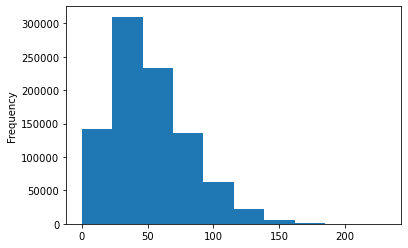

In [11]:
df.sale_amount.plot.hist()

<AxesSubplot:ylabel='Frequency'>

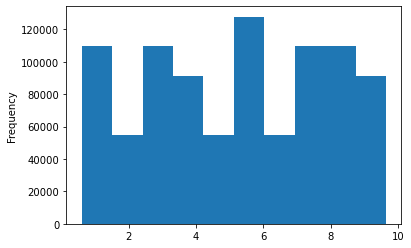

In [12]:
df.item_price.plot.hist()

(array([109560.,  54780., 109560.,  91300.,  54780., 127820.,  54780.,
        109560., 109560.,  91300.]),
 array([0.6  , 1.504, 2.408, 3.312, 4.216, 5.12 , 6.024, 6.928, 7.832,
        8.736, 9.64 ]),
 <BarContainer object of 10 artists>)

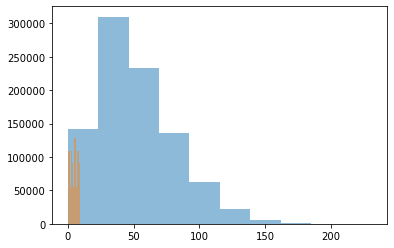

In [13]:
x = df.sale_amount
y = df.item_price


plt.hist(x, alpha = 0.5, label = "sale amount")
plt.hist(y, alpha = 0.5, label = "item price")

#### 3. Set the index to be the datetime variable.

In [14]:
df = df.set_index('sale_date').sort_index()

In [15]:
df.head()

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221


#### 4. Add a 'month' and 'day of week' column to your dataframe. 

In [16]:
df["month"] = df.index.month
df.head()

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1


In [17]:
df['day'] = df.index.day_name()

In [18]:
df.index.day_name()

Index(['Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       ...
       'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'],
      dtype='object', name='sale_date', length=913000)

In [ ]:
df.head()

In [ ]:
# Big thanks to Anthony and John helping on this one! Was reminded that I need to be careful of when to add the () at the end of an argument when method chaining. Getting better at it.

#### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [19]:
df['sales_total'] = (df.sale_amount) * (df.item_price)

## 6. Make Functions

- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [20]:
def prep_data():
    
    #Creating the df:
    if os.path.isfile('store_data.csv'):
        df = pd.read_csv('store_data.csv')
        print('Read df from .csv')
    else:
        df = acquire.my_get_store_data_read()
        print("Acquired df from database.")
    
    # Cleaning up extra index column;
    df.drop(columns = ['index'], inplace = True)
    
    # Changing the sale_date column to datetime type. Note the shrftime formatting:
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
    
    # I am running the sale_amount and item_price viz in a separate function.
    
    # Set the index to be the datetime variable:
    df = df.set_index('sale_date').sort_index()
    
    # Adding a 'month' and 'day of week' columns:
    df["month"] = df.index.month
    df['day'] = df.index.day_name()
    
    # Adding column for sales_total, which is the total order: total items * item price.
    df['sales_total'] = (df.sale_amount) * (df.item_price)
    
    return df

In [21]:
df_test = prep_data()

Read df from .csv


In [22]:
df_test.head()

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,Tuesday,294.00


In [23]:
# It worked!

df_test.shape

(913000, 16)

### Plotting Distributions

- Creating a function that visualizes the distributions of data

In [ ]:
# Creating the data:
data1 = df.sale_amount
data2 = df.item_price

fig, ax1 = plt.subplots(figsize = (13, 9))

color = 'tab:orange'
ax1.set_xlabel('')
ax1.set_ylabel('Daily Measurement', color=color)
ax1.plot.hist(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cumulative', color=color)  # we already handled the x-label with ax1
ax2.plot.hist(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Daily Precipitation and Cumulative Running Total", fontsize = 14, fontweight = 'bold')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# OPS Data

In [24]:
# Reading the data into a new df:

ops_df = acquire.get_germany_power()

In [25]:
print(ops_df.shape)
ops_df.head()

(4383, 5)


,date,consumption,wind,solar,wind_solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


#### 1. Convert date column to datetime format.

In [26]:
ops_df.date = pd.to_datetime(ops_df.date)

In [27]:
ops_df = ops_df.set_index('date').sort_index()

In [28]:
ops_df.columns

Index(['consumption', 'wind', 'solar', 'wind_solar'], dtype='object')

#### 2. Plot the distribution of each of your variables.

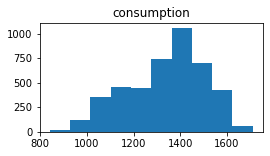

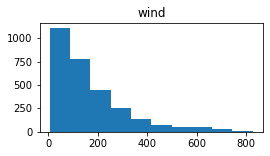

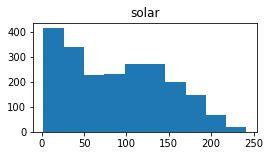

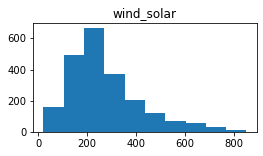

In [29]:
for col in ops_df.columns:
    plt.figure(figsize = (4, 2))
    plt.hist(ops_df[col])
    plt.title(col)
    plt.show()

#### 3. Set the index to be the datetime variable.

In [30]:
# Already done above.

#### 4. Add a month and a year column to your dataframe.

In [31]:
ops_df['month'] = ops_df.index.month
ops_df['year'] = ops_df.index.year

In [32]:
ops_df.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


#### 5. Fill any missing values.

In [33]:
# Since the nan values in this dataframe are true missing values (no data collected), I'm going to replace with 0.

ops_df.fillna(0)

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


### 6. Functions
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [34]:
def prep_ops():
    
    # acquiring the data:
    ops_df = acquire.get_germany_power()
    
    # Converting the date column to datetime:
    ops_df.date = pd.to_datetime(ops_df.date)
    
    # Setting the date as the index:
    ops_df = ops_df.set_index('date').sort_index()
    
    # Visulizing the columns:
    for col in ops_df.columns:
        plt.figure(figsize = (4, 2))
        plt.hist(ops_df[col])
        plt.title(col)
        plt.show()
    
    # Adding month and year columns:
    ops_df['month'] = ops_df.index.month
    ops_df['year'] = ops_df.index.year
    
    # filling missing values:
    ops_df.fillna(0)
    
    return ops_df

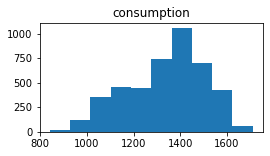

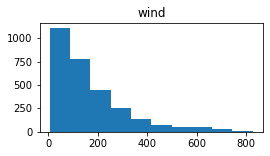

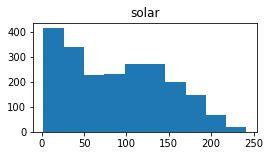

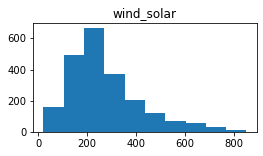

In [35]:
ops_df_test = prep_ops()

In [36]:
ops_df_test.shape

(4383, 6)